# Trabalho de Implementação - Heurísticas e Metaheurísticas
## Thiago Pádua de Carvalho - 2020007066

### Código auxiliar

In [26]:
import os
import pandas as pd
import re
import seaborn as sns
import subprocess
import time
import matplotlib.pyplot as plt

In [66]:
class Report:
    def __init__(self):
        self.df = pd.DataFrame(columns=["Instance", "Heuristic", "Time (s)", "Result"])


    def generate_report(self, instance_path, mode="NN", initial_temperature=400, alpha=0.99):
        if mode == "NN":
            heuristic = "Nearest Neighbor"
        elif mode == "VND":
            heuristic = "Variable Neighborhood Descent"
        elif mode == "ILS":
            heuristic = "Iterated Local Search"

        if mode == "ILS":
            start_time = time.time()
            result = subprocess.run(['./heuristic', instance_path, mode, str(initial_temperature), str(alpha)], capture_output=True, text=True)
            end_time = time.time()
            elapsed_time = end_time - start_time
        else:
            start_time = time.time()
            result = subprocess.run(['./heuristic', instance_path, mode], capture_output=True, text=True)
            end_time = time.time()
            elapsed_time = end_time - start_time

        instance_path = re.sub(r'\w+\/', "", instance_path)

        # Add new line to the dataframe
        self.df.loc[len(self.df)] = [instance_path, heuristic, elapsed_time, float(result.stdout.strip())]

        return self.df


    def average_time(self):
        average_df = self.df.groupby('Instance', as_index=False)['Time (s)'].mean()
        average_df.rename(columns={"Time (s)": "Average Time (s)"}, inplace=True)
        return average_df


    def average_results(self):
        average_df = self.df.groupby('Instance', as_index=False)['Result'].mean()
        average_df.rename(columns={"Result": "Average Result"}, inplace=True)
        return average_df


    def reset_report(self):
        self.df = pd.DataFrame(columns=["Instance", "Heuristic", "Time (s)", "Result"])


    def report(self, number_of_iterations = 100, mode="NN"):
        """
        Generate a report of the heuristic performance on the TSP instances
        Parameters:
        - number_of_iterations: number of times the heuristic will be run on each instance
        - mode: "NN" for Nearest Neighbor or "VND" for Variable Neighborhood Descent
        """
        directory = "instances/EUC_2D"

        for _ in range(number_of_iterations):
            for file in os.listdir(directory):
                filepath = os.path.join(directory, file)
                self.generate_report(filepath, mode)
            self.generate_report("instances/att48.tsp", mode)

        df_time = self.average_time()
        df_result = self.average_results()

        final_report = pd.merge(df_time, df_result, on="Instance")

        return final_report


In [67]:
def generate_ILS_instance_report(instance_path, alphas, initial_temperatures):
    time_results = []
    distance_results = []

    for alpha in alphas:
        for initial_temperature in initial_temperatures:
            start_time = time.time()
            distance = subprocess.run(['./heuristic', instance_path, "ILS", str(initial_temperature), str(alpha)], capture_output=True, text=True)
            end_time = time.time()
            elapsed_time = end_time - start_time

            time_results.append((alpha, initial_temperature, elapsed_time))
            distance_results.append((alpha, initial_temperature, float(distance.stdout.strip())))

    return time_results, distance_results


In [78]:
def plot_ILS_instance_heatmap(time_data, distance_data):
    df_time = pd.DataFrame(time_data, columns=["Alpha", "Initial Temperature", "Time"])
    df_time = df_time.pivot(columns="Alpha", index="Initial Temperature", values="Time")

    df_distance = pd.DataFrame(distance_data, columns=["Alpha", "Initial Temperature", "Distance"])
    df_distance = df_distance.pivot(columns="Alpha", index="Initial Temperature", values="Distance")

    fig, axes = plt.subplots(1, 2, figsize=(16, 9))

    sns.heatmap(df_time, annot=True, cmap="viridis", fmt=".2f", ax=axes[0])
    axes[0].set_title("Time")
    axes[0].set_xlabel("Alpha")
    axes[0].set_ylabel("Initial Temperature")

    sns.heatmap(df_distance, annot=True, cmap="viridis", fmt=".2f", ax=axes[1])
    axes[1].set_title("Distance")
    axes[1].set_xlabel("Alpha")
    axes[1].set_ylabel("Initial Temperature")

    fig.suptitle("Time and Distance Heatmaps for ILS on berlin52.tsp")
    plt.tight_layout()
    plt.show()

In [76]:
report_NN = Report()
final_report_NN = report_NN.report(number_of_iterations=100, mode="NN")

In [77]:
report_VND = Report()
# final_report_VND = report_VND.report(number_of_iterations=100, mode="VND")  # This might take a while
# Luckily, I have saved the report to a csv file, so you can load it whenever you want
final_report_VND = pd.read_csv("results/VND_report.csv")

In [69]:
report_ILS = Report()
# final_report_ILS = report_ILS.report(number_of_iterations=100, mode="ILS")
final_report_ILS = pd.read_csv("results/ILS_report.csv")

In [70]:
optimal = [
    ["att48.tsp", 48, "ATT", 10628],
    ["berlin52.tsp", 52, "EUC_2D", 7542],
    ["kroA100.tsp", 100, "EUC_2D", 21282],
    ["kroA150.tsp", 150, "EUC_2D", 26524],
    ["kroA200.tsp", 200, "EUC_2D", 29368],
    ["kroB100.tsp", 100, "EUC_2D", 22141],
    ["kroB150.tsp", 150, "EUC_2D", 26130],
    ["kroB200.tsp", 200, "EUC_2D", 29437],
    ["kroC100.tsp", 100, "EUC_2D", 20749],
    ["kroD100.tsp", 100, "EUC_2D", 21294],
    ["kroE100.tsp", 100, "EUC_2D", 22068],
    ["lin105.tsp", 105, "EUC_2D", 14379],
    ["pr107.tsp", 107, "EUC_2D", 44303],
    ["pr124.tsp", 124, "EUC_2D", 59030],
    ["pr136.tsp", 136, "EUC_2D", 96772],
    ["pr144.tsp", 144, "EUC_2D", 58537],
    ["pr152.tsp", 152, "EUC_2D", 73682],
    ["pr76.tsp", 76, "EUC_2D", 108159],
    ["rat195.tsp", 195, "EUC_2D", 2323],
    ["rat99.tsp", 99, "EUC_2D", 1211],
    ["st70.tsp", 70, "EUC_2D", 675],
]

optimal_results = pd.DataFrame(optimal, columns=["Instance", "#cities", "Type", "Result"])

In [71]:
def plot_comparison(dataframes):
    """
    Plot a comparison between the results and times of the heuristics
    """
    methods = ["Nearest Neighbor", "Variable Neighborhood Descent", "Iterated Local Search"]

    for dataframe, method in zip(dataframes, methods):
        dataframe.rename(columns={"Average Time (s)": f"Average Time {method}", "Average Result": f"Average Result {method}"}, inplace=True)

    comparison_df = dataframes[0]
    for df in dataframes[1:]:
        comparison_df = pd.merge(comparison_df, df, on="Instance")

    plt.figure(figsize=(12, 6))
    for _, method in zip(dataframes, methods):
        plt.plot(comparison_df["Instance"], comparison_df[f"Average Result {method}"], label=f"Average Result {method}", marker="o")
    plt.plot(optimal_results["Instance"], optimal_results["Result"], label="Optimal Result", marker="o", color="green")
    plt.title("Comparação de Resultados Médios")
    plt.xlabel("Instance")
    plt.ylabel("Average Result")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    for _, method in zip(dataframes, methods):
        plt.plot(comparison_df["Instance"], comparison_df[f"Average Time {method}"], label=f"Average Time {method}", marker="o")
    plt.title("Comparação de Tempos Médios")
    plt.xlabel("Instance")
    plt.ylabel("Average Time (s)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Heurística Construtiva - Nearest Neighbour
A heurística construtiva escolhida foi a Nearest Neighbour. Sua estratégia é simples e consegue atingir uma boa aproximação do valor ótimo de maneira relativamente eficiente. A ideia é começar em um vértice arbitrário e, a partir dele, escolher o mais próximo que ainda não foi visitado. O algoritmo termina quando um ciclo hamiltoniano com nós correspondentes a todas as cidades é completo. A complexidade é O(n²) no pior caso, onde n corresponde ao número de cidades (pontos).

### Implementação
Instâncias geométricas, onde as cidades correspondem a pontos no plano e a distância entre duas cidades depende de suas coordenadas apresentam a vantagem de possibilitar descartar rapidamente grandes grupos de arestas, aproveitando a geometria com estruturas de dados apropriadas.

#### **K-D Tree**
Em particular, para pontos no plano, é possível construir em tempo O(Nlog⁡N) uma estrutura de dados (ED) que permita responder a consultas de vizinhos mais próximos em tempo médio bem inferior a O(N) por consulta. A estrutura escolhida foi a k-d tree, com k = 2 dimensões.

Árvores desse tipo são similares a Binary Seach Trees. A diferença é que, em vez de comparar a chave de busca com a chave do nó atual, ela é comparada com a coordenada correspondente do nó atual. A cada nível da árvore, a dimensão da comparação é alternada. A árvore é construída recursivamente, de maneira que cada nó acrescentado divide o espaço em duas regiões menores, até que cada nó contenha um ponto. Desse modo, o número de operações necessárias para encontrar vizinhos mais próximos geralmente é em média O(log⁡N), quando a árvore á balanceada

![K-D Tree](images/KDtree.png)

Sendo assim, os passos da heurística são os seguintes:
```
1. Construir a k-d tree com as cidades
2. Inicializar o ciclo hamiltoniano com uma cidade arbitrária
3. Enquanto houver cidades não visitadas:
    4. Encontrar a cidade mais próxima da última cidade visitada
    5. Adicionar a cidade ao ciclo
    6. Remover a última cidade visitada da k-d tree
7. Adicionar a primeira cidade ao ciclo
```



### Análise dos Resultados
Observando a média nas métricas de tempo e qualidade do resultado para 100 execuções das instâncias disponíveis, a heurística apresentou um desempenho satisfatório. O tempo médio de execução não superou 10ms. Isso, contudo, não foi acompanhado de uma qualidade de resultado tão próxima das soluções ótimas.

Nearest Neighbour, portanto, se mostra como uma heurística rápida e sua aplicação pode ser interessante em problemas onde a qualidade da solução não é o fator mais importante ou a velocidade da execução é um fator crítico.

In [73]:
display(final_report_NN)

,Instance,Average Time Nearest Neighbor,Average Result Nearest Neighbor
0,att48.tsp,0.007087,46702.18000
1,berlin52.tsp,0.006970,9973.31000
2,kroA100.tsp,0.007284,36760.61900
3,kroA150.tsp,0.007531,41892.61500
4,kroA200.tsp,0.007716,46305.62700
5,kroB100.tsp,0.007393,35571.75100
6,kroB150.tsp,0.007585,40788.70700
7,kroB200.tsp,0.007758,47853.88600
8,kroC100.tsp,0.007136,33184.02500
9,kroD100.tsp,0.007250,33692.73800


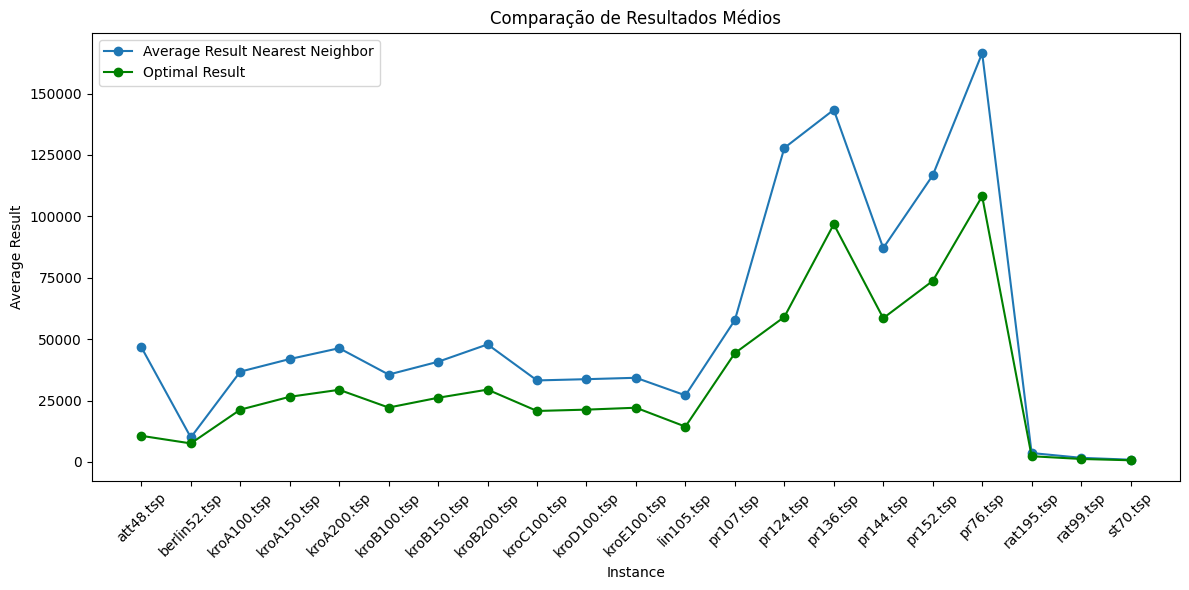

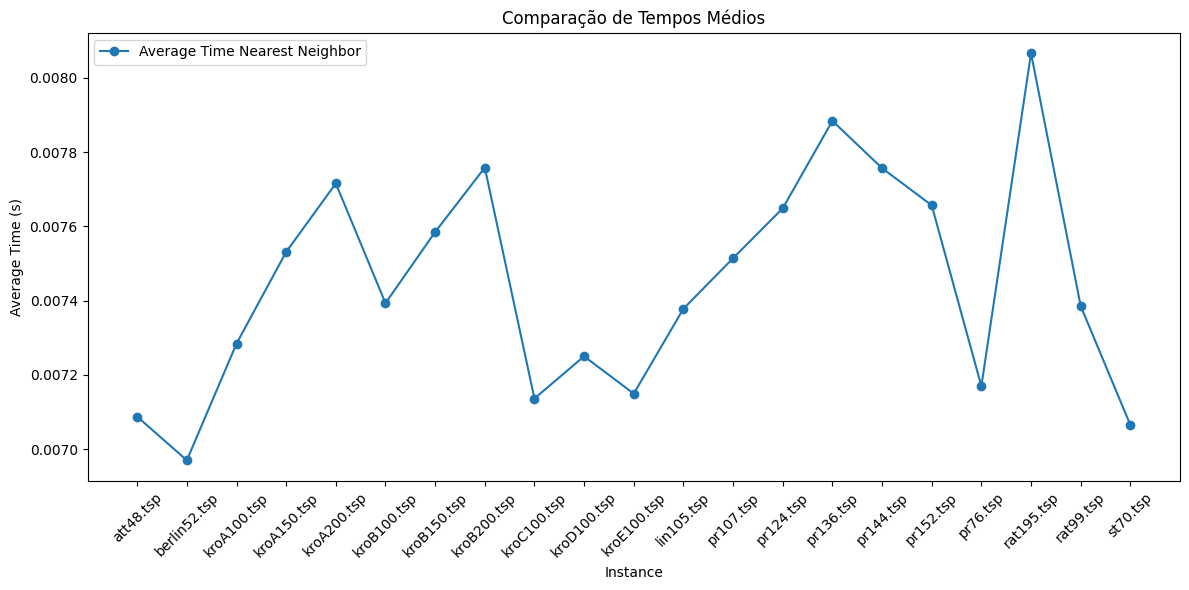

In [74]:
plot_comparison([final_report_NN])

## Variable Neighborhood Descent (VND)
O VND é uma metaheurística que explora múltiplas vizinhanças, as quais realizam buscas locais individualmente para escapar de ótimos locais e encontrar soluções melhores.

### Estrutura e Funcionamento
O VND é composto por uma solução inicial e um conjunto de vizinhanças. A execução é inciada por um caminho inicial - nesse caso o ciclo hamiltoniano gerado pela heurística construtiva de Nearest Neighbour - que é melhorado iterativamente.

As vizinhanças são dispostas em ordem crescente de complexidade, de modo que as mais custosas sejam menos frequentemente exploradas. A solução inicial é passada como parâmetro para a busca local da primeira vizinhança (N1), produzindo uma melhoria. Esse resultado é, então levado à vizinhança adiante.

N2 então realiza outra busca local. Caso a resultado seja melhorado, o processo é reiniciado a partir da primeira vizinhança. Caso contrário, a busca é realizada na próxima. O procedimento continua até que nenhuma melhoria seja encontrada em todas elas, indicando que a solução atual é localmente ótima para o conjunto de vizinhanças explorado.

### Implementação
#### Heurística Construtiva Inicial
Foi escolhida a heurística de Nearest Neighbour para gerar o ciclo hamiltoniano inicial. Suas vantagens são a simplicidade e eficiência, além de ser uma boa aproximação para o valor ótimo.

#### Vizinhanças
As vizinhanças escolhidas foram da família k-opt. Esta é uma classe de heurísticas para o Problema do Caixeiro Viajante (TSP) que visa melhorar uma solução inicial trocando k arestas por outras k arestas, reconectando as cidades de forma a reduzir a distância total do percurso.

k representa a granularidade da troca: quanto maior o valor de k, maior o espaço de busca explorado.
2-opt e o 3-opt foram as variantes escolhidas devido ao equilíbrio entre simplicidade e eficácia.
Heurísticas de k-opt são fundamentais em buscas locais e em meta-heurísticas como VND, devido à sua capacidade de escapar de ótimos locais mais restritos.

N1. **2-opt**:\
A heurística 2-opt tenta resolver o problema de intersecção de arestas no percurso. Ela Busca duas arestas que cruzam entre si e as troca por duas novas arestas que eliminam o cruzamento. Isso é feito invertendo a ordem dos nós no segmento entre as arestas selecionadas.

Funcionamento:

1. Seleciona dois índices i e j = i + 2 no percurso, aproveitando a simetria para reduzir o espaço de busca pela metade.
2. Calcula o delta (diferença na distância total) causado pela troca.
3. Se a troca resultar em uma redução na distância, os nós entre ii e jj são invertidos.

Por questão de eficiência, foi implementada a modalidade de busca local First Improvement, que para a busca ao encontrar a primeira melhoria, ao invés de continuar a busca até o fim para cada iteração.

![2-Opt](images/2-opt.png)

N2. **3-opt**:\
A heurística 3-opt é uma extensão do 2-opt, que considera a troca de três arestas em vez de duas.

Gera mais possibilidades de reconexão do percurso ao remover três arestas e tentar reconectá-las de maneira mais eficiente.
Reduz ainda mais as interseções e explora mudanças mais complexas no percurso.

Funcionamento:

1. Seleciona três arestas, definindo segmentos do percurso.
2. Calcula as possíveis reconexões (8 no total) que podem ser feitas entre os segmentos.
3. Aplica a reconexão que reduz mais significativamente a distância total.

Complexidade:

O número de trocas possíveis é maior que no 2-opt, resultando em O(n³) verificações no pior caso.
Embora mais custoso, o 3-opt é mais poderoso para escapar de ótimos locais do que o 2-opt.

Como a complexidade do 3-opt é maior, ele é explorado apenas quando o 2-opt não encontra melhorias. Além disso, foi escolhida a modalidade Best Improvement, que explora todas as possibilidades de troca e escolhe a que resulta na maior redução da distância total para cada iteração.

![3-Opt](images/3-opt.png)

| Aspecto                  | **2-opt**            | **3-opt**            |
|--------------------------|----------------------|----------------------|
| Trocas                   | 2 arestas           | 3 arestas           |
| Complexidade Computacional | \( O(n²) \)        | \( O(n³) \)        |
| Exploração               | Limitada            | Mais abrangente     |
| Facilidade de Implementação | Alta                | Moderada            |
| Efetividade              | Boa                 | Excelente           |


### Análise dos Resultados
Verificando o contraste entre as soluções geradas pela heurística construtiva e a metaheurística VND, é possível observar claramente o trade-off entre tempo de execução e qualidade da solução. Enquanto Nearest Neighbour é muita rápida, seus resultados são piores para todas as instâncias do problema, especialmente para as maiores. O VND, por outro lado, é mais lento, porém consegue melhorar significativamente as soluções iniciais, atingindo valores mais próximos do ótimo.

In [75]:
display(final_report_VND)
final_report_VND.to_csv("VND_report.csv", index=False)

,Instance,Average Time Variable Neighborhood Descent,Average Result Variable Neighborhood Descent
0,att48.tsp,0.134846,33786.05000
1,berlin52.tsp,0.139536,7796.46990
2,kroA100.tsp,1.673963,21665.88200
3,kroA150.tsp,11.267395,27576.74000
4,kroA200.tsp,32.317969,30243.05600
5,kroB100.tsp,2.132092,22619.61900
6,kroB150.tsp,12.108032,26685.89500
7,kroB200.tsp,39.216280,30451.74400
8,kroC100.tsp,2.084641,21433.16600
9,kroD100.tsp,2.653021,21945.86000


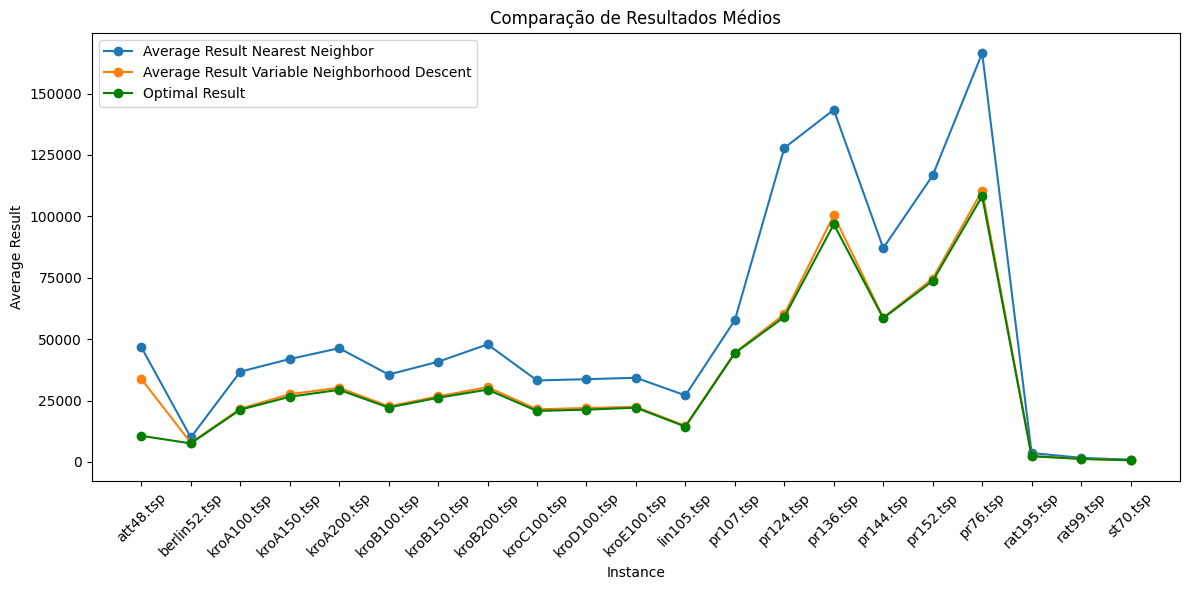

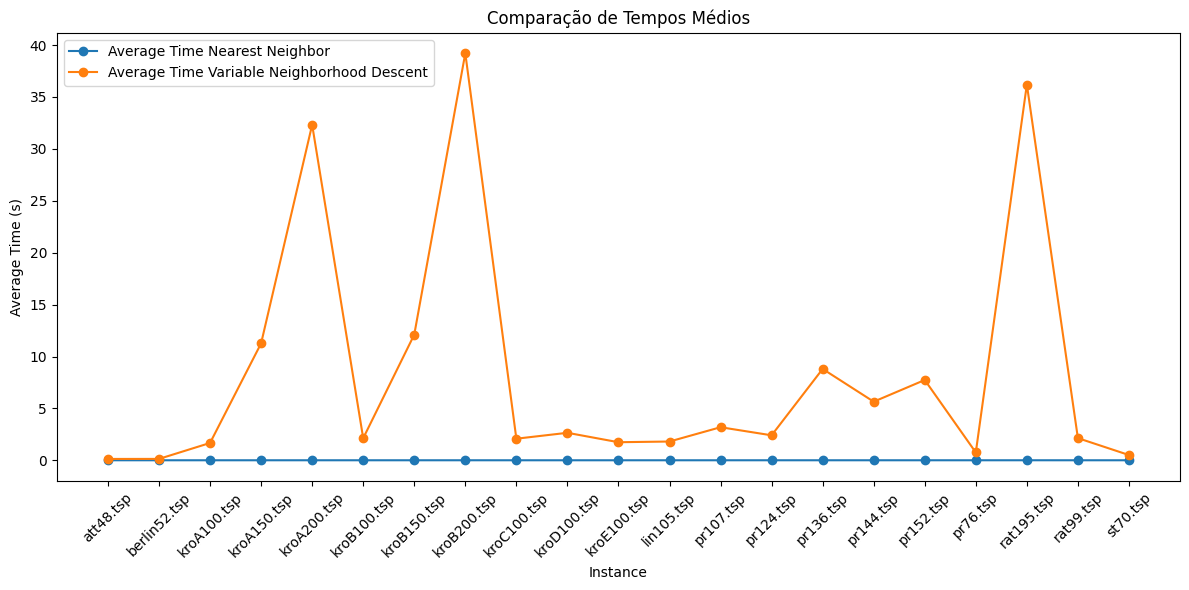

In [76]:
plot_comparison([final_report_NN, final_report_VND])

## Metaherística de Iterated Local Search (ILS)
A metaheurística de Iterated Local Search (ILS) é uma técnica de busca local que combina a exploração de vizinhanças com a introdução de perturbações aleatórias. O objetivo é escapar de valores que podem não ser globais e encontrar soluções melhores através de buscas diversificadas que acontecem iterativamente a partir sucessivos ótimos locais.

ILS é uma abordagem derivada da busca local com múltiplas partidas, em que ao invés de iniciar de soluções aleatórias, a busca começa a partir de perturbações de ótimos locais, que são considerados como soluções de origem.
### Estrutura e Funcionamento
Assim como o VND, o ILS parte de uma solução inicial, que é um ciclo hamiltoniano gerado pela heurística construtiva de Nearest Neighbour. A partir dela, inicia-se a busca local, que é realizada por meio de vizinhanças geradas através do método de 3-opt. Desse momento em diante, entra-se em um loop de perturbação e busca local, que constitui o núcleo da metaheurística.
#### Perturbação
A perturbação é uma operação que modifica a solução atual de maneira a escapar de ótimos locais. No caso apresentado, o double-bridge move foi escolhido para diversificar as soluções encontradas. A operação consiste em dividir o ciclo em quatro segmentos A, B, C e D, e reconectá-los de modo ADCB. Essa partição tem um componente aleatório, em que cada um dos pontos de corte é escolhido randomicamente, fazendo com que cada porção possa ter um comprimento distinto a cada iteração. A imagem a seguir dá uma noção geral da técnica:

![Double Bridge Move](images/double-bridge.png)

É fundamental que a perturbação seja capaz de gerar soluções suficientemente distintas da solução atual, de modo a explorar novas regiões do espaço de busca. Ao mesmo tempo, ela não pode ser tão drástica a ponto de descartar completamente a informação já acumulada pela busca local. Nesse sentido, o double-bridge move se mostrou uma escolha adequada, pois consegue diversificar as soluções, enquanto mantém boa parte da estrutura do ciclo original no interior dos segmentos.
#### Busca Local
A busca local é realizada por meio da heurística de 3-opt, rearranjando as arestas do ciclo hamiltoniano de modo a escolher a reconexão que resulta na maior redução da distância total, assim como feito para o VND. A diferença é que, no ILS, a busca local é realizada após a perturbação, o que permite explorar novas regiões do espaço de busca. Além disso, a solução retornada nem sempre melhora a solução atual, o que é um aspecto fundamental para a diversificação gerada pela metaheurística.
#### Critério de Aceitação
O critério de aceitação é um aspecto importante do ILS, pois ele faz parte do controle do trade-off diversificação/intensificação da metaheurística. Sua escolha é um ponto crítico, pois ele deve ser capaz de explorar o espaço de busca de maneira eficiente, sem rejeitar soluções que podem ser ótimas locais. No caso apresentado, foi escolhido o critério de aceitação probabilístico, que aceita soluções piores com uma probabilidade que diminui ao longo das iterações. A ideia é que, no início, soluções piores sejam aceitas com mais frequência, de modo a explorar o espaço de busca. Com o passar do tempo, a chance de aceitação de soluções piores diminui, o que permite a convergência para ótimos locais.
Com isso em mente, o critério de aceitação foi implementado como uma distribuição de probabilidade de Boltzmann, que é uma função exponencial que diminui com o aumento da diferença de custo entre a solução atual e a solução proposta. A função é dada por:
A probabilidade de aceitar uma solução pior em um algoritmo baseado na distribuição de Boltzmann é dada por:
$$
P = e^{-\frac{\Delta E}{T}}
$$
Onde:
- P: Probabilidade de aceitação.
- Delta E: Diferença entre o custo da nova solução e o custo da solução atual, calculada como:
$$
\Delta E = \text{custo\_novo} - \text{custo\_atual}
$$
- T: Temperatura atual, controlada pelo cooling schedule, que diminui gradualmente durante a execução, de acordo com a equação:
$$
T_{\text{nova}} = \alpha \cdot T_{\text{atual}}
$$
A escolhas da temperatura e de alfa são aspectos críticos, pois eles controla a velocidade de convergência do ILS. Valores muito baixos nesses hiperparâmetros podem fazer com que a busca fique preso em ótimos locais, enquanto valores muito altos podem fazer com que o a metaheurística não explore o espaço de busca de maneira eficiente.

#### Critério de Parada
O algoritmo para quando um critério de parada é atingido. No caso apresentado, a escolha foi por um valor de temperatura mínima, que indica que a busca deve ser interrompida. Outras opções poderiam ser um número máximo de iterações, um número máximo de repetições sem melhoria ou até mesmo um limiar pré-definido para a distância, por exemplo.

Como existe a possibilidade de eventualmente escolher soluções piores, o melhor ótimo local encontrado é sempre salvo e retornado ao fim da execução.

O ILS é capaz de escapar de ótimos locais e encontrar soluções melhores. A combinação de perturbação, busca local e critério de aceitação probabilístico faz com que a metaheurística seja capaz de explorar o espaço de busca de maneira eficiente, escapando de ótimos locais e convergindo para soluções melhores. Seu passo-a-passo é dado por:
```
1. Inicializa a solução inicial com a heurística construtiva de Nearest Neighbour
2. Realiza a busca local com a heurística de 3-opt
3. Entra em um loop de perturbação e busca local:
    4. Perturba a solução com o double-bridge move
    5. Realiza a busca local com a heurística de 3-opt
    6. Calcula a diferença de custo entre a solução atual e a solução proposta
    7. Aceita a solução proposta com uma probabilidade dada pela distribuição de Boltzmann
        - se a solução proposta for melhor que a atual, ela é guardada na memória
    8. Atualiza a temperatura
    9. Repete os passos 4 a 8 até que um critério de parada seja atingido
10. Retorna a melhor solução encontrada
```


### Análise dos Resultados
A metaheurística de ILS, diferentemente das técnicas vistas até então, foi implementada com um critério de aceitação para as soluções intermediárias que possui hiperparâmetros. Isso introduz a possibilidade de arbitrar melhor sobre os resultados encontrados, ajustando a velocidade de convergência. Isso é possitivo, pois traz mais controle sobre o trade-off entre qualidade e tempo da busca, mas também demanda um ajuste fino dos hiperparâmetros para que a busca local iterativa atinja seu potencial máximo.

In [72]:
alphas = [0.9, 0.95, 0.97, 0.99]
initial_temperatures = [100, 200, 400, 600, 1000]

time_results, distance_results = generate_ILS_instance_report("instances/EUC_2D/berlin52.tsp", alphas, initial_temperatures)

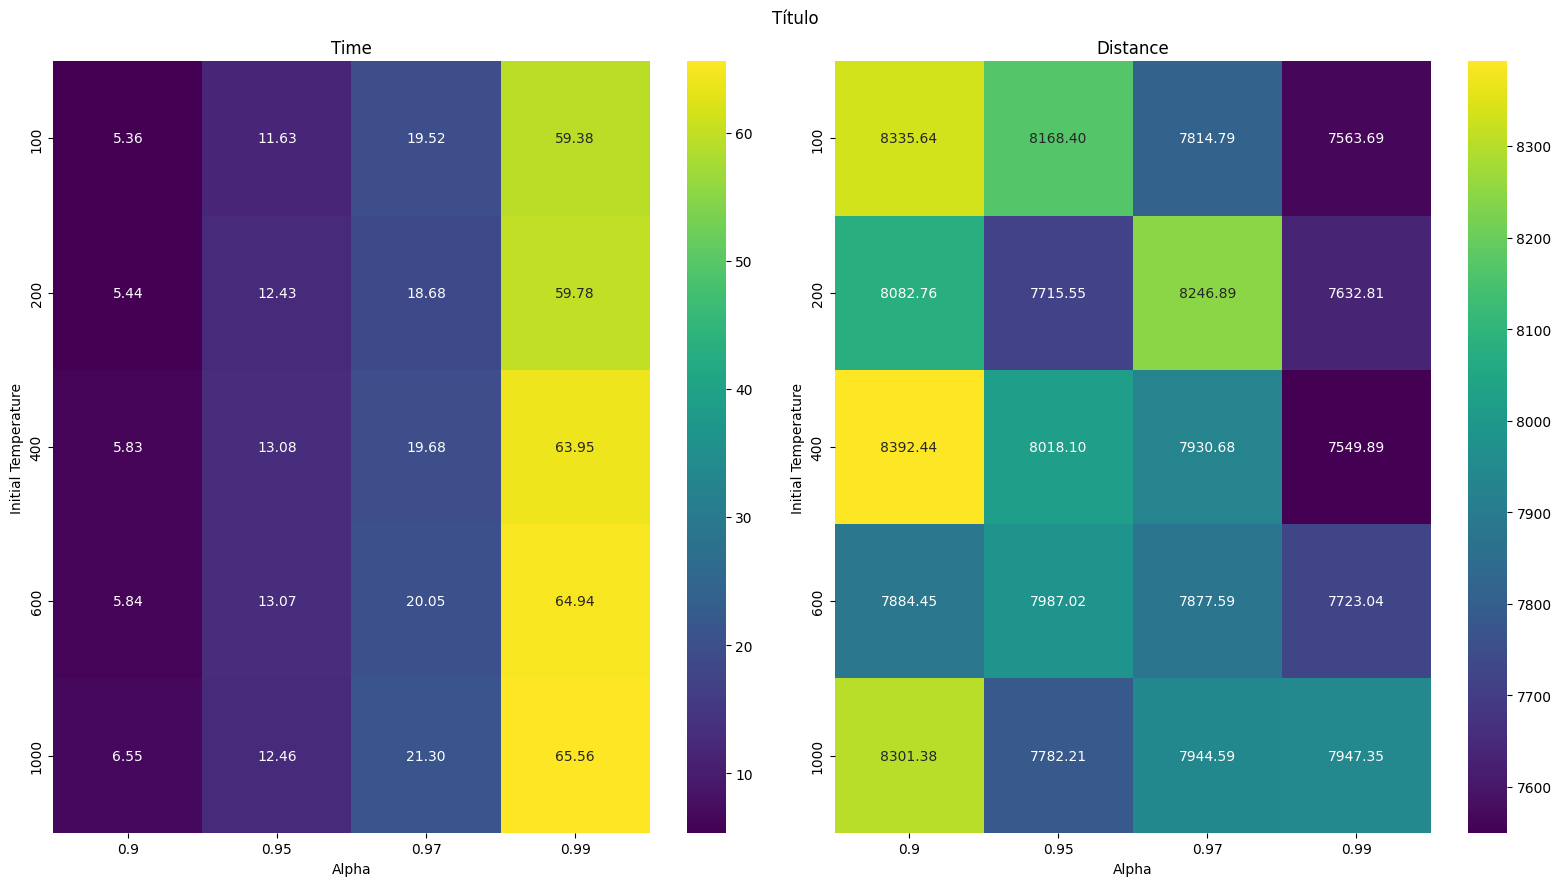

In [73]:
plot_ILS_instance_heatmap(time_results, distance_results)

Pode-se observar pelos mapas de calor o compromisso mencionado anteriormente entre a qualidade das soluções, o tempo de execução e os valores de temperatura e alfa. Execuções rápidas de ILS, isto é, com números baixos para os hiperparâmetros, tendem a convergir mais rapidamente, mas podem ficar presas em ótimos locais. Quando, por outro lado, eles são aumentados, o espaço é potencialmente explorado de maneira mais vasta, possibilitando a descoberta de soluções melhores, mas a um custo de tempo maior. Também foi observado que valores muito altos de temperatura podem diversificar demais a busca e, por isso, obter valores ruins. Além disso, é importante ressaltar que a aleatoriedade é um fator importante na busca, e que a qualidade da solução final pode variar de execução para execução.

In [74]:
display(final_report_ILS)
final_report_ILS.to_csv("ILS_report.csv", index=False)

,Instance,Average Time (s),Average Result
0,att48.tsp,57.693979,35236.00
1,berlin52.tsp,69.297305,7736.01
2,kroA100.tsp,468.702107,23682.90
3,kroA150.tsp,1608.641630,30194.20
4,kroA200.tsp,4076.949042,34966.40
5,kroB100.tsp,487.485985,24382.40
6,kroB150.tsp,1612.225245,31200.00
7,kroB200.tsp,3906.935124,35680.60
8,kroC100.tsp,479.951487,22219.00
9,kroD100.tsp,478.963547,23716.50


## Análise Final

Após a implementação e execução de todas as técnicas, é possível observar que cada uma delas possui suas vantagens e desvantagens. A escolha por uma heurística ou metaheurística depende de diversos fatores, como a qualidade da solução desejada, o tempo disponível para a execução e a complexidade do problema. Nesse sentido, Nearest Neighbour é rápida, mas não consegue atingir soluções muito próximas do ótimo. Ela é extremamente util para a elaboração de caminhos iniciais, que são explorados por outros métodos. O VND, por sua vez, é mais lento, mas consegue melhorar significativamente as soluções iniciais, atingindo valores mais próximos do ótimo. O ILS, por fim, é capaz de escapar de ótimos locais e encontrar boas soluções, mas demanda um ajuste fino dos hiperparâmetros para atingir seu potencial máximo.

A seguir são apresentados os gráficos de comparativos gerais e também uma tabela comparando as médias das soluções encontradas por cada técnica com o valor ótimo conhecido para cada instância.

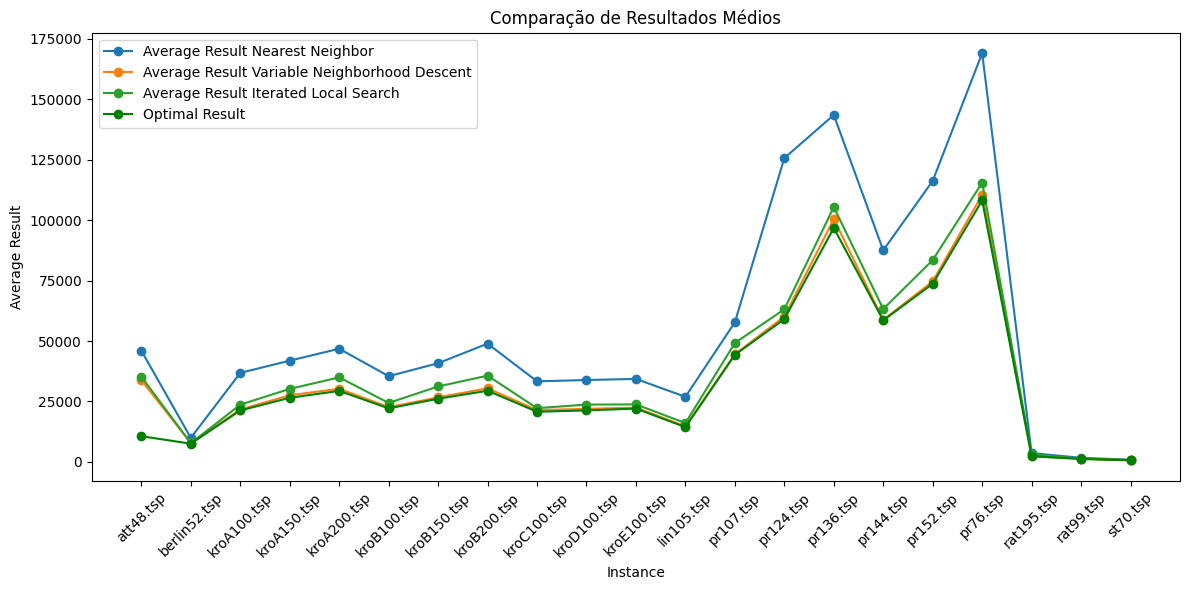

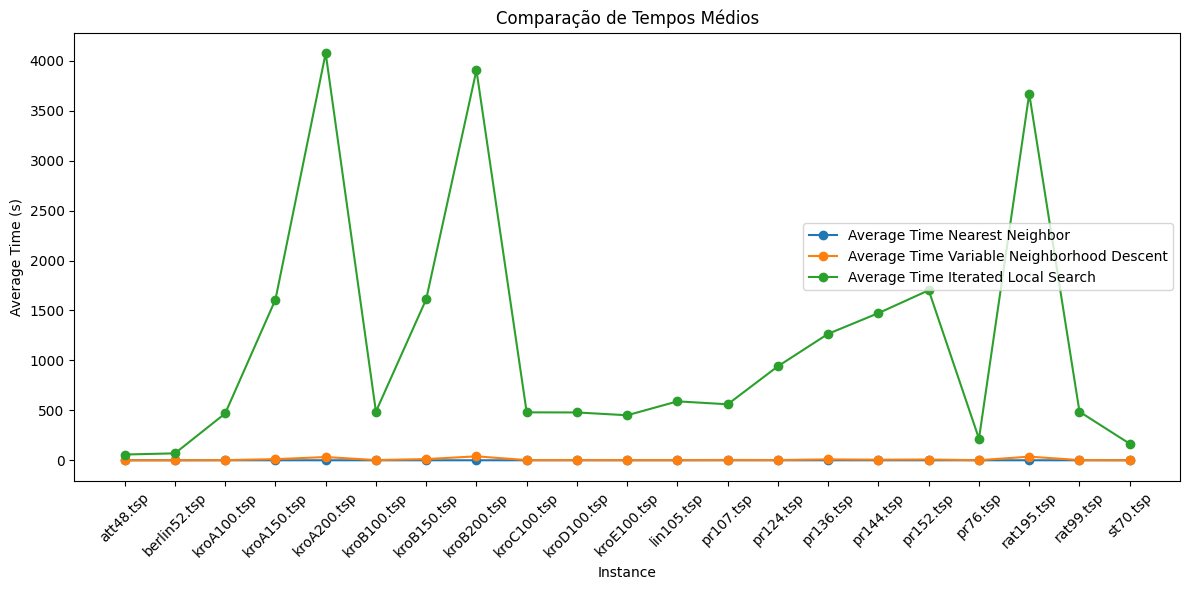

In [79]:
plot_comparison([final_report_NN, final_report_VND, final_report_ILS])

Pode-se perceber que o melhor método desenvolvido foi o de VND, que conseguiu encontrar soluções mais próximas do ótimo em um tempo de execução razoável. O ILS, por sua vez, também obteve bons resultados, mas demandou um tempo de execução maior. Já o Nearest Neighbour, apesar de ser muito rápido, não conseguiu atingir soluções próximas do ótimo.

O resultado não tão bom do ILS pode ser atribuído ao fato de que cada instância demanda uma escolha adequada de hiperparâmetros, o que pode ser um desafio. Essa metaheurística se mostra mais adequada para problemas mais específicos, com disponibilidade de tempo para tuning e em cenários que demandam soluções mais próximas do ótimo.

In [88]:
final_report = pd.merge(final_report_VND, final_report_ILS, on="Instance")
final_report = pd.merge(final_report, final_report_NN, on="Instance")
final_report = pd.merge(final_report, optimal_results[['Instance', 'Result']], on="Instance")
final_report.rename(columns={"Result": "Optimal Result"}, inplace=True)
display(final_report)

,Instance,Average Time Variable Neighborhood Descent,Average Result Variable Neighborhood Descent,Average Time Iterated Local Search,Average Result Iterated Local Search,Average Time Nearest Neighbor,Average Result Nearest Neighbor,Optimal Result
0,att48.tsp,0.134846,33786.05000,57.693979,35236.00,0.007339,46022.81000,10628
1,berlin52.tsp,0.139536,7796.46990,69.297305,7736.01,0.007402,9925.62300,7542
2,kroA100.tsp,1.673963,21665.88200,468.702107,23682.90,0.007570,36820.60200,21282
3,kroA150.tsp,11.267395,27576.74000,1608.641630,30194.20,0.007882,41876.13300,26524
4,kroA200.tsp,32.317969,30243.05600,4076.949042,34966.40,0.008217,46814.47700,29368
5,kroB100.tsp,2.132092,22619.61900,487.485985,24382.40,0.007570,35454.76700,22141
6,kroB150.tsp,12.108032,26685.89500,1612.225245,31200.00,0.007757,40815.02700,26130
7,kroB200.tsp,39.216280,30451.74400,3906.935124,35680.60,0.008005,48915.76000,29437
8,kroC100.tsp,2.084641,21433.16600,479.951487,22219.00,0.007603,33325.73300,20749
9,kroD100.tsp,2.653021,21945.86000,478.963547,23716.50,0.007568,33864.73800,21294
